Q5

In [2]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def newton_method(f :Callable, g : Callable, x_0 : int) -> np.array:
    k = 1000
    x = np.zeros((k, 1))
    x[0] = x_0
    for i in range(1, k):
        x[i] = x[i - 1] - (f(x[i - 1]) / g(x[i-i]))
    return x

def modified_newton(f: Callable, g: Callable, x_0: int, k: int) -> np.array:
    k = 1000
    x = np.zeros((k,1))
    x[0] = x_0
    for i in range(1, k):
        x[i] = x[i - 1] - (k* f(x[i - 1]) / g(x[i - 1]))
    return x

In [29]:
f = lambda x: 1 - x*np.exp(1-x)
g = lambda x: (x-1)*np.exp(1-x)
k = 2
alpha = 1
# RNG
rand = np.random.default_rng()
# 20 randon numbers (uniformly)
# adjust for range [-1, 10] a good
# neighborhood around the root
starts = rand.random(size=1) * 11 - 1.0
out_newt = []
out_impr = []
starts = [10.0]
print(starts)

for x0 in starts:
    # We append a vector of error to the root given an inital guess
    out_newt.append(np.abs(newton_method(f, g, x0) - alpha))
    out_impr.append(np.abs(modified_newton(f,g,x0,k) - alpha))

[10.0]


/var/folders/kz/3r71r65n5wj2pd5__r_bk_3r0000gn/T/ipykernel_16553/1709431242.py:1: RuntimeWarning: overflow encountered in exp
  f = lambda x: 1 - x*np.exp(1-x)
/var/folders/kz/3r71r65n5wj2pd5__r_bk_3r0000gn/T/ipykernel_16553/1709431242.py:2: RuntimeWarning: overflow encountered in exp
  g = lambda x: (x-1)*np.exp(1-x)
/var/folders/kz/3r71r65n5wj2pd5__r_bk_3r0000gn/T/ipykernel_16553/4000289024.py:14: RuntimeWarning: invalid value encountered in true_divide
  x[i] = x[i - 1] - (k* f(x[i - 1]) / g(x[i - 1]))


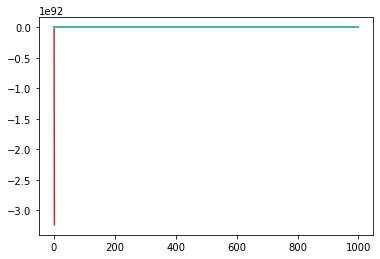

In [19]:
# Plotting for normal Newton method
k = np.arange(1000)
for error in out_newt:
    plt.plot(k, error) 

plt.show()

Q7

In [ ]:
def comp_trap(f: Callable, a: float, b: float, h: float) -> float:
    k = (b-a) / h
    x = np.arange(a + h, b, h)
    return h*(sum([f(xi) for xi in x]) + 0.5*f(a) + 0.5*f(b))
    
def impr_trap(f: Callable, g: Callable, a: float, b: float, h: float) -> float:
    return comp_trap(f, a, b, h) - (1/12)*(h**2)(g(b)-g(a))